## Project-2

#### About Dataset 
A time series matrix with three columns.

Demand:	Total electricity demand in GW for Victoria, Australia, every half-hour during 2014.  
WorkDay: Taking value 1 on work days, and 0 otherwise.  
Temperature: Half-hourly temperatures for Melbourne (BOM site 086071).  

The below cell contains all the questions and further down are the answers to those questions.  

1) Load the dataset into your python environment.  
2) Use TimeSeriesSplit function from Sklearn to split the dataset into 3 parts. The output should be a list of tuples, with each tuple representing (train_index, valid_index).     
3) Use a line chart to Visualize the Electricity demand wrt to Time.    
4) Draw a boxplot:
    - WorkDay (x-axis) and Demand(y-axis)
    - Hour (x-axis) and Demand(y-axis)
    - Month (x-axis) and Demand (y-axis)
5) Draw a scatter plot and measure the pearson correlation between Temperature and Demand(y-axis)

6) Create the following features and build models as mentioned below:
    Features:
        - WorkDay (Already Present)
        - PeakHours (if 6:00-19:00: 1 and otherwise 0)
        - PeakMonths (if Feb, May, Jun, Jul, Aug =1 otherwise 0
    - Using The above 3 features build a LinearRegression and measure cv=3 RMSE  
    - Using the above 3 features build a RandomForestRegressor with n_estimators=50, min_samples_leaf=30 as params and measure cv=3 RMSE
    - Using the above 3 features build a GradientBoostingRegressor with n_estimators=200, min_samples_leaf=10, learning_rate=0.01 and measure cv=3 RMSE

In [1]:
### Load the required libraries
import pandas as pd
import numpy as np
import datetime
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [2]:
def parser(x):
    return pd.datetime.strptime(x, '%Y-%m' )

## 1) Load the dataset into your python environment

In [3]:
data = pd.read_csv("data/elecdemand.csv")
print(data.shape)
data["Datetime"] = pd.to_datetime(data["Datetime"])
data.head()

(17520, 4)


,Datetime,WorkDay,Temperature,Demand
0,2014-01-01 00:00:00,0,16.1,3.698171
1,2014-01-01 00:30:00,0,16.0,3.426123
2,2014-01-01 01:00:00,0,15.6,3.295835
3,2014-01-01 01:30:00,0,15.4,3.166052
4,2014-01-01 02:00:00,0,15.4,3.071107


In [4]:
print(data.Datetime.max())
print(data.Datetime.min())

2014-12-31 23:30:00
2014-01-01 00:00:00


### 2) split the dataset into three parts using TimeSeriesSplit

In [5]:
x = TimeSeriesSplit(3)
x.random_state = 200

In [6]:
splits = list(x.split(data))
print(splits)

[(array([   0,    1,    2, ..., 4377, 4378, 4379]), array([4380, 4381, 4382, ..., 8757, 8758, 8759])), (array([   0,    1,    2, ..., 8757, 8758, 8759]), array([ 8760,  8761,  8762, ..., 13137, 13138, 13139])), (array([    0,     1,     2, ..., 13137, 13138, 13139]), array([13140, 13141, 13142, ..., 17517, 17518, 17519]))]


## 3) Use a line chart to Visualize the Electricity demand wrt to Time.

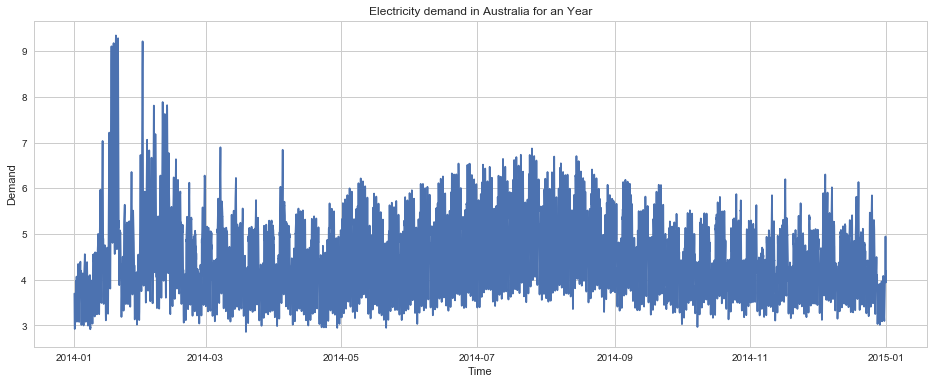

In [7]:
plt.figure(figsize=(16, 6))
plt.plot(data["Datetime"], data["Demand"])
plt.xlabel("Time")
plt.ylabel("Demand")
plt.title("Electricity demand in Australia for an Year")

## 4) Draw a boxplot using WorkDay (x-axis) and Demand(y-axis)

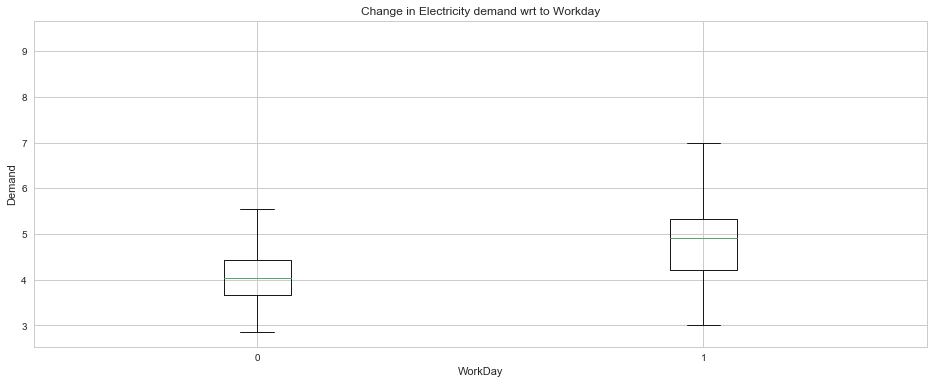

In [8]:
plt.figure(figsize=(16, 6))

one = data[data["WorkDay"] == 0]["Demand"].values
two = data[data["WorkDay"] == 1]["Demand"].values

plt.boxplot([one, two], labels=["0", "1"])
plt.xlabel("WorkDay")
plt.ylabel("Demand")
plt.title("Change in Electricity demand wrt to Workday")

## 5) Draw a scatter plot and measure the correlation between Temperature and Demand(y-axis)

In [9]:
### Measure the correlation
data[["Temperature", "Demand"]].corr(method="pearson")

,Temperature,Demand
Temperature,1.000000,0.280587
Demand,0.280587,1.000000


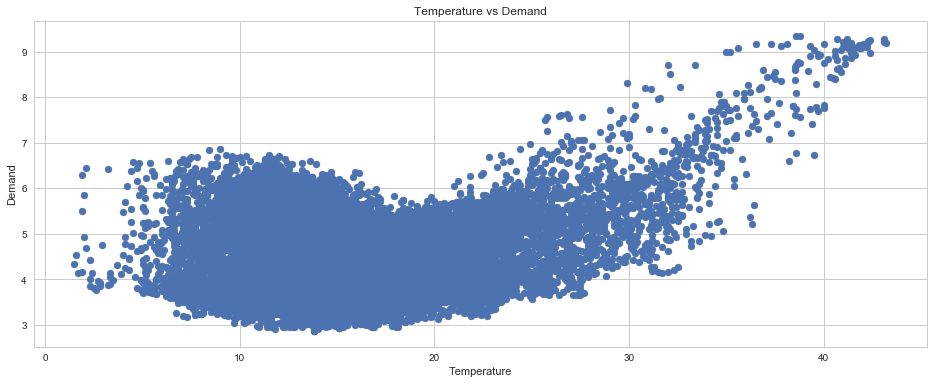

In [10]:
plt.figure(figsize=(16, 6))

plt.scatter(data["Temperature"], data["Demand"])
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.title("Temperature vs Demand")

In [11]:
data["hour"] = data["Datetime"].dt.hour

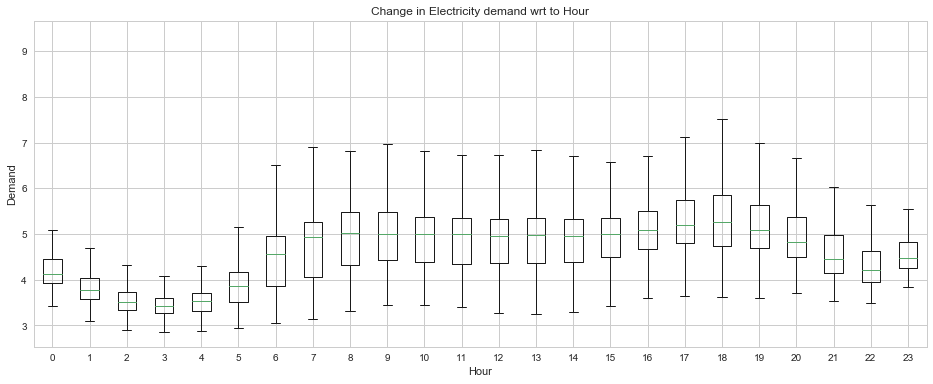

In [12]:
plt.figure(figsize=(16, 6))

hours = []
for i in range(24):
    one = data[data["hour"] == i]["Demand"].values
    hours.append(one)
plt.boxplot(hours, labels=[str(i) for i in range(24)])
plt.xlabel("Hour")
plt.ylabel("Demand")
plt.title("Change in Electricity demand wrt to Hour")

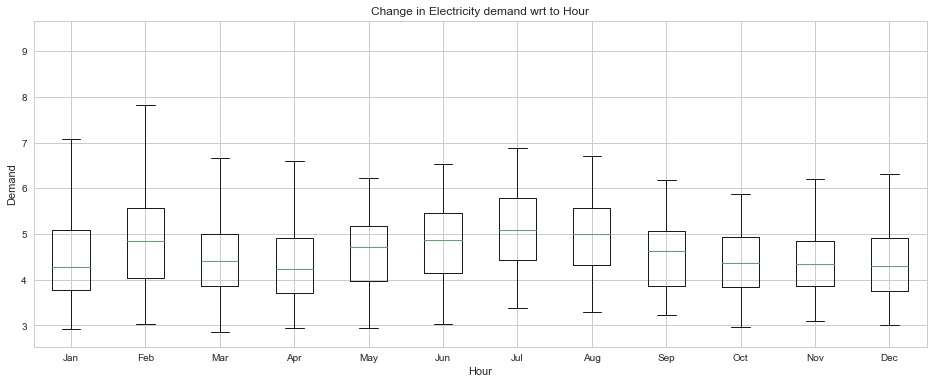

In [13]:
plt.figure(figsize=(16, 6))
data["month"] = data["Datetime"].dt.strftime('%b')
month = []
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for i in month_names:
    one = data[data["month"] == i]["Demand"].values
    month.append(one)
plt.boxplot(month, labels=month_names)
plt.xlabel("Hour")
plt.ylabel("Demand")
plt.title("Change in Electricity demand wrt to Hour")

In [14]:
data["Peakhours"] = data["hour"].apply(lambda x: 1 if x in list(range(6, 20)) else 0)
data["Peakmonths"] = data["month"].apply(lambda x: 1 if x in ["Feb","May", "Jun", "Jul", "Aug"] else 0)
data.head()

,Datetime,WorkDay,Temperature,Demand,hour,month,Peakhours,Peakmonths
0,2014-01-01 00:00:00,0,16.1,3.698171,0,Jan,0,0
1,2014-01-01 00:30:00,0,16.0,3.426123,0,Jan,0,0
2,2014-01-01 01:00:00,0,15.6,3.295835,1,Jan,0,0
3,2014-01-01 01:30:00,0,15.4,3.166052,1,Jan,0,0
4,2014-01-01 02:00:00,0,15.4,3.071107,2,Jan,0,0


In [20]:
fe = ["WorkDay", "Peakhours", "Peakmonths"]

## Linear Regression

In [21]:
rmse = []
for i in splits:
    train = i[0]
    valid = i[1]
    x_train, y_train = data[fe].values[train], data["Demand"].values[train]
    x_valid, y_valid = data[fe].values[valid], data["Demand"].values[valid]
    model = LinearRegression()
    model.fit(x_train, y_train)
    pred = model.predict(x_valid)
    measure = math.pow(mean_squared_error(y_valid, pred), 0.5)
    rmse.append(measure)
print("CV RMSE:", np.mean(rmse))

CV RMSE: 0.552957567989


In [22]:
model.coef_

array([ 0.74502123,  0.94613153,  0.33235967])

## RandomForest

In [23]:
rmse = []
for i in splits:
    train = i[0]
    valid = i[1]
    x_train, y_train = data[fe].values[train], data["Demand"].values[train]
    x_valid, y_valid = data[fe].values[valid], data["Demand"].values[valid]
    model = RandomForestRegressor(n_estimators=50, min_samples_leaf=30)
    model.fit(x_train, y_train)
    pred = model.predict(x_valid)
    measure = math.pow(mean_squared_error(y_valid, pred), 0.5)
    rmse.append(measure)
print("CV RMSE:", np.mean(rmse))

CV RMSE: 0.540021647066


## GradientBoostingMachines

In [24]:
rmse = []
for i in splits:
    train = i[0]
    valid = i[1]
    x_train, y_train = data[fe].values[train], data["Demand"].values[train]
    x_valid, y_valid = data[fe].values[valid], data["Demand"].values[valid]
    model = GradientBoostingRegressor(n_estimators=200, min_samples_leaf=10, learning_rate=0.01)
    model.fit(x_train, y_train)
    pred = model.predict(x_valid)
    measure = math.pow(mean_squared_error(y_valid, pred), 0.5)
    rmse.append(measure)
print("CV RMSE:", np.mean(rmse))

CV RMSE: 0.532328684835
